In [1]:
import pandas as pd
path="https://raw.githubusercontent.com/oussama-hadda/Heart-disease-indicators/main/heart_disease_indicators.csv"
df = pd.read_csv(path)

In [2]:
df.shape

(319795, 18)

In [3]:
df.head() 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# The goal is to predict weither the example has a heart disease or not 

X=df.loc[:,df.columns!='HeartDisease'] # Features
y=df['HeartDisease'] # Class

In [6]:
X.head() 

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
X.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: HeartDisease, dtype: object

In [9]:
y.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [10]:
# Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
num_var=['BMI','PhysicalHealth',	'MentalHealth',	'SleepTime']
for var in num_var:
  X[var]=std.fit_transform(X[[var]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [11]:
# Handling ordinal categorical variables: AgeCategory, GenHealth .
# First, let's get all the categories in each varaible
AgeCategory_categories=X.AgeCategory.unique()
GenHealth_categories=X.GenHealth.unique() 
print("AgeCategory categories: ", AgeCategory_categories)
print("GenHealth categories: ", GenHealth_categories)

AgeCategory categories:  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
GenHealth categories:  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [12]:
AgeCategory_mapping={'18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6,'50-54':7,'55-59':8,'60-64':9,'65-69':10,'70-74':11,'75-79':12,'80 or older':13}
GenHealth_mapping={'Poor' :1,'Fair' :2,'Good':3,'Very good':4,'Excellent':5}
X.loc[:,'AgeCategory']=X.loc[:,'AgeCategory'].map(AgeCategory_mapping)
X.loc[:,'GenHealth']=X.loc[:,'GenHealth'].map(GenHealth_mapping)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
# Handling nominal categorical variables
# i start by yes binary variables (variables that contain two exclusive categories: yes or no)
cat_var=['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
X=pd.get_dummies(X,prefix=cat_var,columns=cat_var, drop_first=True)

In [14]:
# Race and Diabetics are nominal categorical variables that contain more than two categories
X=pd.get_dummies(X) # handle Race and Diabetics

In [15]:
X.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,-1.844750,-0.046751,3.281069,8,4,-1.460354,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,-1.256338,-0.424070,-0.490039,13,4,-0.067601,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,-0.274603,2.091388,3.281069,10,2,0.628776,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,-0.647473,-0.424070,-0.490039,12,3,-0.763977,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-0.726138,3.097572,-0.490039,5,4,0.628776,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [16]:
y=pd.get_dummies(y, drop_first=True)

In [17]:
y.head()

,Yes
0,0
1,0
2,0
3,0
4,0


**1.Logistic regression**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
LR=LogisticRegression(penalty='l2', solver='sag') # sag is a good opitmizer for large datasets
LR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

Accuracy: 0.916221591264431
F1 score: 0.18137374725006114


Text(0.5, 1.0, 'Confusion matrix')

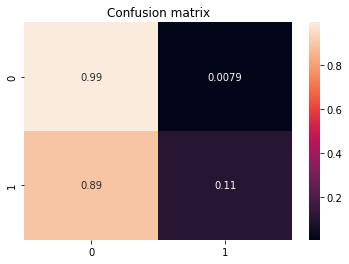

In [ ]:
y_pred=LR.predict(X_test)
# to handle the recall precision trade-off, i choose to evaluate the model using the F1-score.
# the confusion matrix gives us a better understanding on how the algorithm works
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'),annot=True)
plt.title("Confusion matrix")

The classifier isn't doing very well, the F1 score is too low.
By looking at the confusion matrix, we see that the proportion of the true positives is too low. The model doesn't do well on the negative classes. 
<br>
This is due to the small number of examples on this class; few people in the dataset have had a heart disease (remember class 1 represents a heart disease). If you take a look above, you'll find that the number of 'No' is much grater than the number of 'Yes'. 
<br>
This problem is usually referred to as unbalanced datasets.


In [21]:
# By giving 'balanced' to the variable class_label, the model uses the values of y 
# to automatically adjust weights inversely proportional to class frequencies
LR=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced') 
LR.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', solver='sag')

Accuracy: 0.751954370911456
F1 score: 0.35156786449988553


Text(0.5, 1.0, 'Confusion matrix')

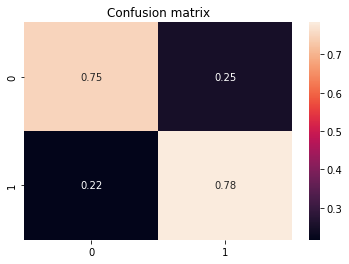

In [ ]:
y_pred=LR.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'),annot=True)
plt.title("Confusion matrix")

Setting the classe_weight variable to 'balanced' made a huge difference. 

---
Another way to handle unbalanced datasets is to do resampling.
<br>
In this following, i will try three methods of resampling:
- Oversampling
- Undersampling
- Synthetic sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=0) # oversampling
# we do the resampling after splitting the data, otherwise the data may not replicate the real-world data
ros.fit(X_train, y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train) 

In [ ]:
LR_ros=LogisticRegression(penalty='l2', solver='sag') 
LR_ros.fit(X_train_ros,y_train_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', solver='sag')

Accuracy: 0.7537680271172873
F1 score: 0.3513246342427837


Text(0.5, 1.0, 'Confusion matrix')

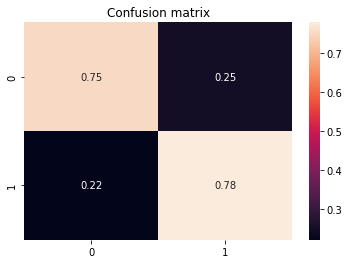

In [ ]:
y_pred_ros=LR_ros.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_ros))
print("F1 score:",f1_score(y_test,y_pred_ros)) 
plt.figure() 
sns.heatmap(confusion_matrix(y_test,y_pred_ros,normalize='true'),annot=True)
plt.title("Confusion matrix")

In [ ]:
# Let's try with undersampling
rus = RandomUnderSampler(sampling_strategy='majority', random_state=0)
rus.fit(X_train, y_train)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train) 


In [ ]:
LR_rus=LogisticRegression(penalty='l2', solver='sag') 
LR_rus.fit(X_train_rus,y_train_rus) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

Accuracy: 0.752066942675956
F1 score: 0.35005574136008916


Text(0.5, 1.0, 'Confusion matrix')

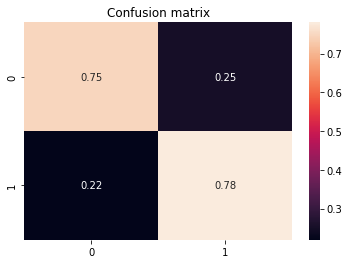

In [ ]:
y_pred_rus=LR_rus.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_rus))
print("F1 score:",f1_score(y_test,y_pred_rus)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_rus,normalize='true'),annot=True)
plt.title("Confusion matrix")

In [ ]:
# Synthetic sampling
from imblearn.over_sampling import SMOTE
ss = SMOTE(sampling_strategy= 'minority',random_state = 0)
X_train_ss, y_train_ss = ss.fit_resample(X_train, y_train) 

In [ ]:
LR_ss=LogisticRegression(penalty='l2', solver='sag') 
LR_ss.fit(X_train_ss,y_train_ss)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='sag')

Accuracy: 0.762235925402444
F1 score: 0.34030886690959566


Text(0.5, 1.0, 'Confusion matrix')

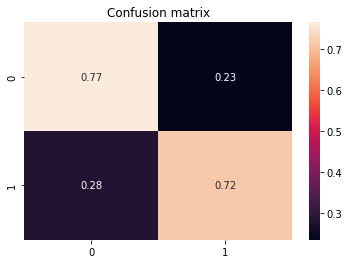

In [ ]:
y_pred_ss=LR_ss.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_ss))
print("F1 score:",f1_score(y_test,y_pred_ss)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_ss,normalize='true'),annot=True)
plt.title("Confusion matrix")

Sampling methods give an F1 score that is close to the the one obtained by setting the variable class_weight as 'balanced'. In the following, i will use this model.

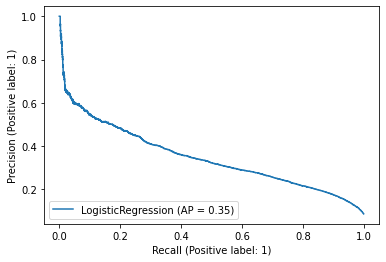

In [32]:
# Choosing the threshold
PrecisionRecallDisplay.from_estimator(LR, X_test, y_test) 

In [ ]:
from sklearn.model_selection import cross_val_score 
from statistics import mean
thresholds=[0.1, 0.3,0.5, 0.7, 0.8, 0.85 , 0.9 , 0.95] 
F1=[]

for t in thresholds:
  LR_t=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t ) 
  f1=cross_val_score(LR_t, X_train, y_train, scoring='f1') #f1 score on validation set
  F1.append(mean(f1)) 

imax=np.argmax(F1)
t=thresholds[imax]
LR_t=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t )
LR_t.fit(X_train,y_train)
y_pred_t=LR_t.predict(X_test)
f1=f1_score(y_test,y_pred_t) # f1 score on test set 
accuracy=accuracy_score(y_test,y_pred_t) # accuracy on test set 

print('Best threshold:', t)
print("Accuracy:",accuracy)
print("F1 score on validation set:",F1[imax])
print("F1 score on test set:", f1)  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best threshold: 0.1
Accuracy: 0.6926040350723587
F1 score on validation set: 0.34782830750398647
F1 score on test set: 0.32084231470734537


In [ ]:
# Another way to improve the model, is by doing feature selection
from sklearn.feature_selection import RFE
rfe=RFE(estimator=LR_t)
rfe.fit(X_train,y_train)
y_pred_rfe=rfe.predict(X_test)
f1=f1_score(y_test,y_pred_rfe) # f1 score on test set 
accuracy=accuracy_score(y_test,y_pred_rfe)
print('F1 score:',f1)
print("Accuracy:",accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

F1 score: 0.3260338776133069
Accuracy: 0.7790341342605911


In [ ]:
# F1 and accuracy increased
# Last thing to improve the model: cross validation to choose regularization parameter
# We do that by cross validation to avoid overfitting
reg_param=[50, 100,150, 200,250,300] 
F1=[]

for C in reg_param:
  LR_C=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t, C=C ) 
  f1=cross_val_score(LR_C, X_train, y_train, scoring='f1') #f1 score on validation set
  F1.append(mean(f1)) 

imax=np.argmax(F1)
C=reg_param[imax]
LR_C=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t, C=C )
LR_C.fit(X_train,y_train)
y_pred_C=LR_C.predict(X_test)
f1=f1_score(y_test,y_pred_C) # f1 score on test set 
accuracy=accuracy_score(y_test,y_pred_C) # accuracy on test set 

print('Best C:', C)
print("F1 score :", f1)  
print("Accuracy:",accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best C: 150
F1 score : 0.34120911460522996
Accuracy: 0.9020000250159477


Next step:
<br>
- SVM
- k-Nearest Neighbors
- Random forest
- Neural networks